In [406]:
import collections
import random

import matplotlib.pyplot as plt
import numpy as np
import tqdm
import matminer
import pymatgen.core, pymatgen.core.composition
import pymatgen.io.ase

import pandas as pd
import swifter

RANDOM_SEED = 12345

pd.options.mode.chained_assignment = None
tqdm.tqdm.pandas()
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [2]:
df = pd.read_pickle("../raw_data/2d_mat_dataset_raw.pkl")
df

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [3]:
structures = df['atoms_object (unitless)'].apply(pymatgen.io.ase.AseAtomsAdaptor.get_structure)
df['ox_struct'] = structures.apply(lambda i: i.copy())
#df.ox_struct.swifter.apply(lambda struct: struct.add_oxidation_state_by_guess())
df.ox_struct.swifter.apply(lambda struct: struct.add_oxidation_state_by_guess())
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [4]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.structure.misc import EwaldEnergy
from matminer.featurizers.structure.order import StructuralComplexity
from matminer.featurizers.structure.symmetry import GlobalSymmetryFeatures

struct_features = MultipleFeaturizer([
    EwaldEnergy(),
    StructuralComplexity(),
    GlobalSymmetryFeatures('n_symmetry_ops'),
])
df[struct_features.feature_labels()] = struct_features.featurize_many(df.ox_struct)
df

MultipleFeaturizer:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [5]:
import warnings
from matminer.featurizers.structure.bonding import GlobalInstabilityIndex
desc = GlobalInstabilityIndex()

def maybe_global_instability(struct):
    try:
        return desc.featurize(struct)[0]
    except:
        return None

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    df['global_instability']=df.ox_struct.swifter.apply(maybe_global_instability)
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [6]:
from pymatgen.analysis.local_env import JmolNN
from matminer.featurizers.site.bonding import AverageBondLength

neighbor_finder = JmolNN()

def average_bond_length(structure, featurizer = AverageBondLength(neighbor_finder)):
    n_atoms = len(structure)
    try:
        lengths = map(lambda i: featurizer.featurize(structure, i)[0], range(n_atoms))
        return sum(lengths) / n_atoms
    except IndexError:
        return None

df['bond_length_average'] = df.ox_struct.swifter.apply(average_bond_length).copy()
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [7]:
from matminer.featurizers.site.bonding import AverageBondAngle

def average_bond_angle(structure, featurizer = AverageBondAngle(neighbor_finder)):
    n_atoms = len(structure)
    try:
        angles = map(lambda i: featurizer.featurize(structure, i)[0], range(n_atoms))
        return sum(angles) / n_atoms
    except IndexError:
        return None
df['bond_angle_average'] = df.ox_struct.swifter.apply(average_bond_angle).copy()
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/matminer/featurizers/site/bonding.py:250: RuntimeWarning: All-NaN slice encountered
  minimum_bond_angles = np.nanmin(bond_angles, axis=1)


2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [8]:
def average_cn(structure, neighbor_finder = neighbor_finder):
    n_atoms = len(structure)
    cns = map(lambda i: neighbor_finder.get_cn(structure, i), range(n_atoms))
    return sum(cns) / n_atoms
df['average_cn'] = df.ox_struct.swifter.apply(average_cn).copy()
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [9]:
def ab_perimeter_area_ratio(structure):
    a, b, c = structure.lattice.matrix
    perimeter = 2*np.linalg.norm(a) + 2*np.linalg.norm(b)
    area = np.linalg.norm(np.cross(a,b))
    return perimeter / area
df['perimeter_area_ratio'] = df.ox_struct.swifter.apply(ab_perimeter_area_ratio).copy()
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    IrF2                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     TlS                    bottom-up   
3                2dm-4   MoCl2                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [10]:
df["formula"] = df["atoms_object (unitless)"].swifter.apply(lambda atoms: atoms.get_chemical_formula(empirical=True))
df

Pandas Apply:   0%|          | 0/6351 [00:00<?, ?it/s]

2dm_id (unitless) formula discovery_process (unitless)  \
0                2dm-1    F2Ir                    bottom-up   
1                2dm-2   Ba2Sb                    bottom-up   
2                2dm-3     STl                    bottom-up   
3                2dm-4   Cl2Mo                    bottom-up   
4             2dm-6367    IrO2                    bottom-up   
...                ...     ...                          ...   
6346          2dm-6366    BiTe                    bottom-up   
6347            2dm-84     PtS                    bottom-up   
6348           2dm-152    PtSe                    bottom-up   
6349          2dm-6459     PtS                    bottom-up   
6350          2dm-6460    PtSe                    bottom-up   

                                atoms_object (unitless)  \
0     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...   
1     (Atom('Ba', [2.476683476681, 1.429910903420999...   
2     (Atom('Tl', [2.63896615613751, 10.292177253854...   
3     (Atom('Mo', [1.5833675, 2.687975714894, 2.6388...   
4     (Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...   
...                                                 ...   
6346  (Atom('Bi', [6.537243774895211, 2.363799214670...   
6347  (Atom('Pt', [1.7596322562971602, 1.01592211741...   
6348  (Atom('Pt', [1.84215348881831, 1.0635655531000...   
6349  (Atom('Pt', [1.8200943700922698, 1.05082975916...   
6350  (Atom('Pt', [1.89334041000488, 1.0931183002139...   

                                   potcars (unitless)  is_hubbard (unitless)  \
0         [PAW_PBE Ir 06Sep2000, PAW_PBE F 08Apr2002]                  False   
1     [PAW_PBE Ba_sv 06Sep2000, PAW_PBE Sb 06Sep2000]                  False   
2       [PAW_PBE Tl_d 06Sep2000, PAW_PBE S 17Jan2003]                  False   
3     [PAW_PBE Mo_pv 08Apr2002, PAW_PBE Cl 17Jan2003]                  False   
4         [PAW_PBE Ir 06Sep2000, PAW_PBE O 08Apr2002]                  False   
...                                               ...                    ...   
6346     [PAW_PBE Bi 08Apr2002, PAW_PBE Te 08Apr2002]                  False   
6347      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6348     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   
6349      [PAW_PBE Pt 05Jan2001, PAW_PBE S 17Jan2003]                  False   
6350     [PAW_PBE Pt 05Jan2001, PAW_PBE Se 06Sep2000]                  False   

      energy_per_atom (eV)  decomposition_energy (eV/atom)  \
0                -4.536822                        0.799800   
1                -3.243794                        0.300023   
2                -3.325673                        0.177412   
3                -5.294281                        0.485815   
4                -6.799664                        0.237090   
...                    ...                             ...   
6346                   NaN                             NaN   
6347             -5.115980                        0.389542   
6348             -4.839190                        0.263491   
6349             -5.322218                        0.183304   
6350             -5.025182                        0.077500   

      exfoliation_energy_per_atom (eV/atom)  energy_vdw_per_atom (eV/atom)  \
0                                  0.234617                      -3.361686   
1                                  0.210645                      -2.186996   
2                                  0.095794                      -2.231434   
3                                 -0.055818                      -4.469708   
4                                       NaN                      -5.835956   
...                                     ...                            ...   
6346                                    NaN                      -2.305475   
6347                               0.113072                      -4.245431   
6348                               0.125031                      -3.856898   
6349                               0.108621          

In [28]:
# df = df_bak.copy()
# df_bak.to_pickle("all_descriptors.pkl")

In [90]:
#df = df[df["discovery_process (unitless)"] == "top-down"]
#df.to_pickle("all_descriptors_topdown.pkl")
to_drop = [ "discovery_process (unitless)",
            "atoms_object (unitless)",
            'potcars (unitless)',
            'is_hubbard (unitless)',
            'energy_per_atom (eV)',
            'decomposition_energy (eV/atom)',
            'is_bandgap_direct (unitless)',
            'is_metal (unitless)',
            'energy_vdw_per_atom (eV/atom)',
            'total_magnetization (Bohr Magneton)',
            'ox_struct']
df.drop(columns=to_drop).to_csv("bg_extra_descriptors_topdown.csv")
df

2dm_id (unitless)  formula discovery_process (unitless)  \
2979          2dm-2990        O                     top-down   
2980          2dm-2991      C3N                     top-down   
2981          2dm-2992      GaN                     top-down   
2982          2dm-2993      BLi                     top-down   
2983          2dm-2994       Ga                     top-down   
...                ...      ...                          ...   
5914          2dm-5925     CrO2                     top-down   
5915          2dm-5926  F5O2Sb3                     top-down   
5916          2dm-5927   Cu2O4W                     top-down   
5917          2dm-5928   Cu3O6Y                     top-down   
5918          2dm-5929   Cu3F5O                     top-down   

                                atoms_object (unitless)  \
2979             (Atom('O', [0.0, 0.0, 10.0], index=0))   
2980  (Atom('C', [0.0, 2.368312135, 10.0001167924674...   
2981  (Atom('Ga', [-3.493867195558664e-07, 1.8541533...   
2982  (Atom('Li', [0.771551245, 1.5362468836519032, ...   
2983  (Atom('Ga', [0.0, 1.9967273025, 12.48843928789...   
...                                                 ...   
5914  (Atom('Cr', [2.8873920816912, 1.81739738104317...   
5915  (Atom('Sb', [2.0257909675, -0.0004625275, 13.1...   
5916  (Atom('Cu', [0.4691929979250579, 4.04889537196...   
5917  (Atom('Y', [3.710449378146997, 8.9803816536181...   
5918  (Atom('Cu', [4.852632856491071, 3.646413510988...   

                                     potcars (unitless)  \
2979                              [PAW_PBE O 08Apr2002]   
2980         [PAW_PBE C 08Apr2002, PAW_PBE N 08Apr2002]   
2981      [PAW_PBE Ga_d 06Sep2000, PAW_PBE N 08Apr2002]   
2982     [PAW_PBE Li_sv 23Jan2001, PAW_PBE B 06Sep2000]   
2983                           [PAW_PBE Ga_d 06Sep2000]   
...                                                 ...   
5914     [PAW_PBE Cr_pv 07Sep2000, PAW_PBE O 08Apr2002]   
5915  [PAW_PBE Sb 06Sep2000, PAW_PBE O 08Apr2002, PA...   
5916  [PAW_PBE Cu_pv 06Sep2000, PAW_PBE W_pv 06Sep20...   
5917  [PAW_PBE Y_sv 06Sep2000, PAW_PBE Cu_pv 06Sep20...   
5918  [PAW_PBE Cu_pv 06Sep2000, PAW_PBE O 08Apr2002,...   

      is_hubbard (unitless)  energy_per_atom (eV)  \
2979                  False             -3.416400   
2980                  False             -7.118129   
2981                  False             -5.803293   
2982                  False             -3.820308   
2983                  False             -2.800399   
...                     ...                   ...   
5914                   True             -7.185808   
5915                  False             -5.174224   
5916                   True             -6.124239   
5917                  False             -5.737111   
5918                  False             -4.078910   

      decomposition_energy (eV/atom)  exfoliation_energy_per_atom (eV/atom)  \
2979                        1.519128                               0.072404   
2980                        1.788156                               0.087979   
2981                        0.354161                               0.066609   
2982                        0.650700                               0.687758   
2983                        0.236834                                    NaN   
...                              ...                                    ...   
5914                        0.232824                               0.081378   
5915                        0.035039                                    NaN   
5916                        0.221992                               0.053196   
5917                        0.347647                               0.198842   
5918                        0.176613                               0.222029   

      energy_vdw_per_atom (eV/atom)  ...  \
2979                      -2.816888  ...   
2980                      -7.049869  ...   
2981                      -4.443864  ...   
2982                      -3.505639  ...   
2983        

# Chemical Info

In [243]:
#df_physical_aphysical = df.copy()
df = df[df["exfoliation_energy_per_atom (eV/atom)"].apply(lambda exfol: 0 <= exfol <= 0.1) & df["decomposition_energy (eV/atom)"] == 0]

In [244]:
df[df["decomposition_energy (eV/atom)"] >= 0].drop(columns=to_drop).to_csv("both_topdown_decompGEQZero.csv")

In [245]:
df[df["exfoliation_energy_per_atom (eV/atom)"] <= 0].drop(columns=to_drop).to_csv("both_topdown_exfolLEQZero.csv")

In [246]:
df[df["is_hubbard (unitless)"] == True].drop(columns=to_drop).to_csv("both_topdown_transitionMetalOxidesFluorides.csv")

In [258]:
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: "N" in atoms.get_chemical_symbols())].drop(columns=to_drop).to_csv("both_topdown_nitridesOnly.csv")
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: "O" in atoms.get_chemical_symbols())].drop(columns=to_drop).to_csv("both_topdown_oxidesOnly.csv")
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: "S" in atoms.get_chemical_symbols())].drop(columns=to_drop).to_csv("both_topdown_sulfidesOnly.csv")
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: "C" in atoms.get_chemical_symbols())].drop(columns=to_drop).to_csv("both_topdown_carbidesOnly.csv")
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: any(symbol in ["F", "Cl", "Br", "Cl"] for symbol in atoms.get_chemical_symbols()))].drop(columns=to_drop).to_csv("both_topdown_halidesOnly.csv")
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: any(symbol in ["O", "S", "Se", "Te"] for symbol in atoms.get_chemical_symbols()))].drop(columns=to_drop).to_csv("both_topdown_chaclogensOnly.csv")
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: any(symbol in ["N", "P", "As", "Sb"] for symbol in atoms.get_chemical_symbols()))].drop(columns=to_drop).to_csv("both_topdown_pnictogensOnly.csv")

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

In [248]:
pblock_metals = ["Al", "Ga", "Ge", "In", "Sn", "Sb", "Tl", "Pb", "Bi", "Po"]
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: any(symbol in pblock_metals for symbol in atoms.get_chemical_symbols()))].drop(columns=to_drop).to_csv("both_topdown_pBlockMetalsOnly.csv")

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

In [249]:
d9_coinage_metals = ["Cu", "Ag", "Au"]
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: any(symbol in d9_coinage_metals for symbol in atoms.get_chemical_symbols()))].drop(columns=to_drop).to_csv("both_topdown_d9CoinageMetalsOnly.csv")

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

In [250]:
# Based on https://en.wikipedia.org/wiki/Wide-bandgap_semiconductor and https://www.kymatech.com/about/faqs/429-what-is-an-ultra-wide-bandgap-semiconductor-material
df[df["bandgap (eV)"] == 0].drop(columns=to_drop).to_csv("both_topdown_metallicOnly.csv")
df[df["bandgap (eV)"].swifter.apply(lambda bg: 0 < bg < 2)].drop(columns=to_drop).to_csv("both_topdown_conventionalSemiconductorsOnly.csv")
df[df["bandgap (eV)"].swifter.apply(lambda bg: 2 <= bg <= 3.4)].drop(columns=to_drop).to_csv("both_topdown_WBGOnly.csv")
df[df["bandgap (eV)"].swifter.apply(lambda bg: 3.4 < bg < 10)].drop(columns=to_drop).to_csv("both_topdown_UWBGOnly.csv")

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

# KNN

In [251]:
import sklearn.cluster

In [252]:
n_clusters = 8
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters,
                                max_iter=3000,
                                random_state=RANDOM_SEED)
data_kmeans = df.drop(columns=to_drop + ["formula", "2dm_id (unitless)"]).fillna(df.drop(columns=to_drop + ["formula", "2dm_id (unitless)"]).mean())
classes = kmeans.fit_predict(data_kmeans.to_numpy())
df["kmeans_cluster"] = classes

for i in range(n_clusters):
    df[df["kmeans_cluster"]==i].drop(columns=to_drop + ["kmeans_cluster"]).to_csv(f"both_topdown_cluster{i}.csv")

In [253]:
df

2dm_id (unitless)  formula discovery_process (unitless)  \
2982          2dm-2993      BLi                     top-down   
2983          2dm-2994       Ga                     top-down   
2985          2dm-2996     CDy2                     top-down   
2986          2dm-2997    BrHgN                     top-down   
2987          2dm-2998     LiMg                     top-down   
...                ...      ...                          ...   
5912          2dm-5923     B2S3                     top-down   
5913          2dm-5924   As2O7W                     top-down   
5915          2dm-5926  F5O2Sb3                     top-down   
5917          2dm-5928   Cu3O6Y                     top-down   
5918          2dm-5929   Cu3F5O                     top-down   

                                atoms_object (unitless)  \
2982  (Atom('Li', [0.771551245, 1.5362468836519032, ...   
2983  (Atom('Ga', [0.0, 1.9967273025, 12.48843928789...   
2985  (Atom('Dy', [0.0, 0.0, 12.719732277102239], in...   
2986  (Atom('Hg', [0.0, 2.23028744, 11.2614236866513...   
2987  (Atom('Li', [1.5913309413293502, 0.91875373124...   
...                                                 ...   
5912  (Atom('B', [7.6861405138859675, 9.898523404562...   
5913  (Atom('As', [1.9598787673868545, 7.45492472813...   
5915  (Atom('Sb', [2.0257909675, -0.0004625275, 13.1...   
5917  (Atom('Y', [3.710449378146997, 8.9803816536181...   
5918  (Atom('Cu', [4.852632856491071, 3.646413510988...   

                                     potcars (unitless)  \
2982     [PAW_PBE Li_sv 23Jan2001, PAW_PBE B 06Sep2000]   
2983                           [PAW_PBE Ga_d 06Sep2000]   
2985      [PAW_PBE Dy_3 06Sep2000, PAW_PBE C 08Apr2002]   
2986  [PAW_PBE Hg 06Sep2000, PAW_PBE Br 06Sep2000, P...   
2987  [PAW_PBE Li_sv 23Jan2001, PAW_PBE Mg_pv 06Sep2...   
...                                                 ...   
5912         [PAW_PBE B 06Sep2000, PAW_PBE S 17Jan2003]   
5913  [PAW_PBE As 06Sep2000, PAW_PBE W_pv 06Sep2000,...   
5915  [PAW_PBE Sb 06Sep2000, PAW_PBE O 08Apr2002, PA...   
5917  [PAW_PBE Y_sv 06Sep2000, PAW_PBE Cu_pv 06Sep20...   
5918  [PAW_PBE Cu_pv 06Sep2000, PAW_PBE O 08Apr2002,...   

      is_hubbard (unitless)  energy_per_atom (eV)  \
2982                  False             -3.820308   
2983                  False             -2.800399   
2985                  False             -6.083638   
2986                  False             -2.416447   
2987                  False             -1.629345   
...                     ...                   ...   
5912                  False             -5.531226   
5913                   True             -6.483363   
5915                  False             -5.174224   
5917                  False             -5.737111   
5918                  False             -4.078910   

      decomposition_energy (eV/atom)  exfoliation_energy_per_atom (eV/atom)  \
2982                        0.650700                               0.687758   
2983                        0.236834                                    NaN   
2985                        0.204968                                    NaN   
2986                        1.163539                               0.153652   
2987                        0.189999                               0.150701   
...                              ...                                    ...   
5912                        0.000000                                    NaN   
5913                        0.107867                                    NaN   
5915                        0.035039                                    NaN   
5917                        0.347647                               0.198842   
5918                        0.176613                               0.222029   

      energy_vdw_per_atom (eV/atom)  ...  ewald_energy_per_atom  \
2982                      -3.505639  ...               0.000000   
2983                      -0.306596  ...               0.000000   
2985                      -4.88

In [254]:
df[df["atoms_object (unitless)"].swifter.apply(lambda atoms: "C" in atoms.get_chemical_symbols())]

Pandas Apply:   0%|          | 0/1886 [00:00<?, ?it/s]

2dm_id (unitless)   formula discovery_process (unitless)  \
2985          2dm-2996      CDy2                     top-down   
3066          2dm-3077     CBMg6                     top-down   
3104          2dm-3115      CMg3                     top-down   
3178          2dm-3189       CY2                     top-down   
3261          2dm-3272     C12Li                     top-down   
...                ...       ...                          ...   
5805          2dm-5816  C2I11Sc6                     top-down   
5814          2dm-5825      CSc2                     top-down   
5863          2dm-5874  C3Li2O9V                     top-down   
5876          2dm-5887  CH2Cu2O5                     top-down   
5895          2dm-5906     CBaO3                     top-down   

                                atoms_object (unitless)  \
2985  (Atom('Dy', [0.0, 0.0, 12.719732277102239], in...   
3066  (Atom('Mg', [0.0, 6.201099114932924, 10.497695...   
3104  (Atom('Mg', [0.0, 1.873076425, 10.306154158869...   
3178  (Atom('Y', [3.54337015168419, 2.0457655562156,...   
3261  (Atom('Li', [0.0, 0.0, 11.892873], index=0), A...   
...                                                 ...   
5805  (Atom('Sc', [7.8288341457709585, 8.52910821962...   
5814  (Atom('Sc', [1.6621509388156104, 0.95964106702...   
5863  (Atom('Li', [0.2654805823826664, 2.3738550625,...   
5876  (Atom('Cu', [7.810225094389813, 3.414022622735...   
5895  (Atom('Ba', [0.0, 3.01611984, 11.837518], inde...   

                                     potcars (unitless)  \
2985      [PAW_PBE Dy_3 06Sep2000, PAW_PBE C 08Apr2002]   
3066  [PAW_PBE Mg_pv 06Sep2000, PAW_PBE B 06Sep2000,...   
3104     [PAW_PBE Mg_pv 06Sep2000, PAW_PBE C 08Apr2002]   
3178      [PAW_PBE Y_sv 06Sep2000, PAW_PBE C 08Apr2002]   
3261     [PAW_PBE Li_sv 23Jan2001, PAW_PBE C 08Apr2002]   
...                                                 ...   
5805  [PAW_PBE Sc_sv 07Sep2000, PAW_PBE C 08Apr2002,...   
5814     [PAW_PBE Sc_sv 07Sep2000, PAW_PBE C 08Apr2002]   
5863  [PAW_PBE Li_sv 23Jan2001, PAW_PBE V_pv 07Sep20...   
5876  [PAW_PBE Cu_pv 06Sep2000, PAW_PBE H 15Jun2001,...   
5895  [PAW_PBE Ba_sv 06Sep2000, PAW_PBE C 08Apr2002,...   

      is_hubbard (unitless)  energy_per_atom (eV)  \
2985                  False             -6.083638   
3066                  False             -2.364445   
3104                  False             -2.536300   
3178                  False             -7.312363   
3261                  False             -8.666571   
...                     ...                   ...   
5805                  False             -4.978331   
5814                  False             -7.337028   
5863                   True                   NaN   
5876                  False             -5.779901   
5895                  False             -7.181616   

      decomposition_energy (eV/atom)  exfoliation_energy_per_atom (eV/atom)  \
2985                        0.204968                                    NaN   
3066                        0.872451                               0.493784   
3104                        0.973007                               0.326311   
3178                        0.266099                               0.410741   
3261                        0.000000                               0.038372   
...                              ...                                    ...   
5805                        0.000000                               0.078595   
5814                        0.337919                               0.423716   
5863                             NaN                               0.057570   
5876                        0.060663                                    NaN   
5895                        0.284926                               0.352458   

      energy_vdw_per_atom (eV/atom)  ...  ewald_energy_per_atom  \
2985                      -4.880298  ...               0.000000   
3066                      -1.003114  ...               0.000000   
3104               

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Count'>

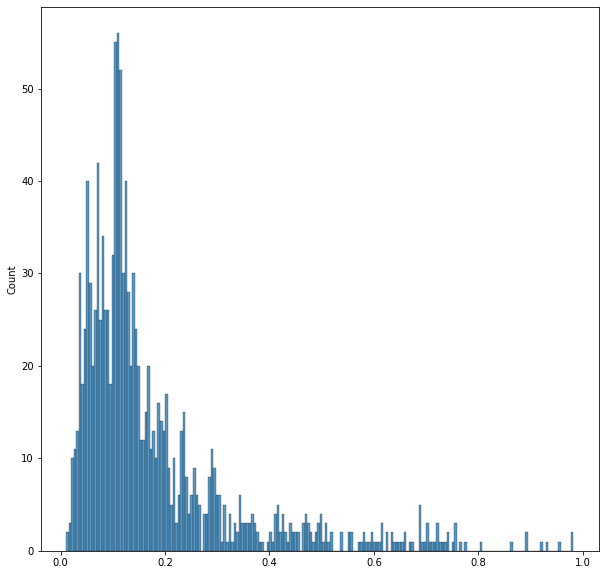

In [455]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,10)
decomps = df["exfoliation_energy_per_atom (eV/atom)"][df["exfoliation_energy_per_atom (eV/atom)"].apply(lambda exfol: 0 < exfol < 1)].to_numpy()
sns.histplot(decomps, bins=200)

In [452]:
for i in [0.25, 0.5, 0.75]:
    print(i, df["exfoliation_energy_per_atom (eV/atom)"].quantile(i))
# df["exfoliation_energy_per_atom (eV/atom)"].describeibe()

0.25 0.07873261666666664
0.5 0.12198015777777726
0.75 0.20930816333333313


In [183]:
df

2dm_id (unitless)  formula discovery_process (unitless)  \
2979          2dm-2990        O                     top-down   
2980          2dm-2991      C3N                     top-down   
2981          2dm-2992      GaN                     top-down   
2982          2dm-2993      BLi                     top-down   
2983          2dm-2994       Ga                     top-down   
...                ...      ...                          ...   
5914          2dm-5925     CrO2                     top-down   
5915          2dm-5926  F5O2Sb3                     top-down   
5916          2dm-5927   Cu2O4W                     top-down   
5917          2dm-5928   Cu3O6Y                     top-down   
5918          2dm-5929   Cu3F5O                     top-down   

                                atoms_object (unitless)  \
2979             (Atom('O', [0.0, 0.0, 10.0], index=0))   
2980  (Atom('C', [0.0, 2.368312135, 10.0001167924674...   
2981  (Atom('Ga', [-3.493867195558664e-07, 1.8541533...   
2982  (Atom('Li', [0.771551245, 1.5362468836519032, ...   
2983  (Atom('Ga', [0.0, 1.9967273025, 12.48843928789...   
...                                                 ...   
5914  (Atom('Cr', [2.8873920816912, 1.81739738104317...   
5915  (Atom('Sb', [2.0257909675, -0.0004625275, 13.1...   
5916  (Atom('Cu', [0.4691929979250579, 4.04889537196...   
5917  (Atom('Y', [3.710449378146997, 8.9803816536181...   
5918  (Atom('Cu', [4.852632856491071, 3.646413510988...   

                                     potcars (unitless)  \
2979                              [PAW_PBE O 08Apr2002]   
2980         [PAW_PBE C 08Apr2002, PAW_PBE N 08Apr2002]   
2981      [PAW_PBE Ga_d 06Sep2000, PAW_PBE N 08Apr2002]   
2982     [PAW_PBE Li_sv 23Jan2001, PAW_PBE B 06Sep2000]   
2983                           [PAW_PBE Ga_d 06Sep2000]   
...                                                 ...   
5914     [PAW_PBE Cr_pv 07Sep2000, PAW_PBE O 08Apr2002]   
5915  [PAW_PBE Sb 06Sep2000, PAW_PBE O 08Apr2002, PA...   
5916  [PAW_PBE Cu_pv 06Sep2000, PAW_PBE W_pv 06Sep20...   
5917  [PAW_PBE Y_sv 06Sep2000, PAW_PBE Cu_pv 06Sep20...   
5918  [PAW_PBE Cu_pv 06Sep2000, PAW_PBE O 08Apr2002,...   

      is_hubbard (unitless)  energy_per_atom (eV)  \
2979                  False             -3.416400   
2980                  False             -7.118129   
2981                  False             -5.803293   
2982                  False             -3.820308   
2983                  False             -2.800399   
...                     ...                   ...   
5914                   True             -7.185808   
5915                  False             -5.174224   
5916                   True             -6.124239   
5917                  False             -5.737111   
5918                  False             -4.078910   

      decomposition_energy (eV/atom)  exfoliation_energy_per_atom (eV/atom)  \
2979                        1.519128                               0.072404   
2980                        1.788156                               0.087979   
2981                        0.354161                               0.066609   
2982                        0.650700                               0.687758   
2983                        0.236834                                    NaN   
...                              ...                                    ...   
5914                        0.232824                               0.081378   
5915                        0.035039                                    NaN   
5916                        0.221992                               0.053196   
5917                        0.347647                               0.198842   
5918                        0.176613                               0.222029   

      energy_vdw_per_atom (eV/atom)  ...  ewald_energy_per_atom  \
2979                      -2.816888  ...               0.000000   
2980                      -7.049869  ...             -14.803371   
2981                      -4.44

In [279]:
nonmetal = df[df["bandgap (eV)"]!=0].drop(columns=to_drop + ["2dm_id (unitless)", "formula", "exfoliation_energy_per_atom (eV/atom)", "kmeans_cluster"])

In [300]:
colmask = [":" not in i for i in nonmetal.columns]
masked_df = nonmetal[nonmetal.columns[colmask]]

In [301]:
import sklearn.model_selection
import tpot

data_train, data_test = sklearn.model_selection.train_test_split(nonmetal, test_size=0.25, random_state=RANDOM_SEED)
train_x = data_train.drop(columns="bandgap (eV)").to_numpy()
train_y = data_train["bandgap (eV)"].to_numpy()

test_x = data_test.drop(columns="bandgap (eV)").to_numpy()
test_y = data_test["bandgap (eV)"].to_numpy()


In [308]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=5/60,
    max_time_mins=1,
    cv=5,
    verbosity=2,
    scoring="neg_mean_squared_error",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=4,
    random_state=RANDOM_SEED
)
model.fit(features=train_x, target=train_y)

Imputing missing values in feature set


Traceback (most recent call last):
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 1008, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 1069, in _boost
    estimator.fit(X_, y_)
  Fil

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


1.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=3, min_samples_split=9, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

Imputing missing values in feature set
Imputing missing values in feature set


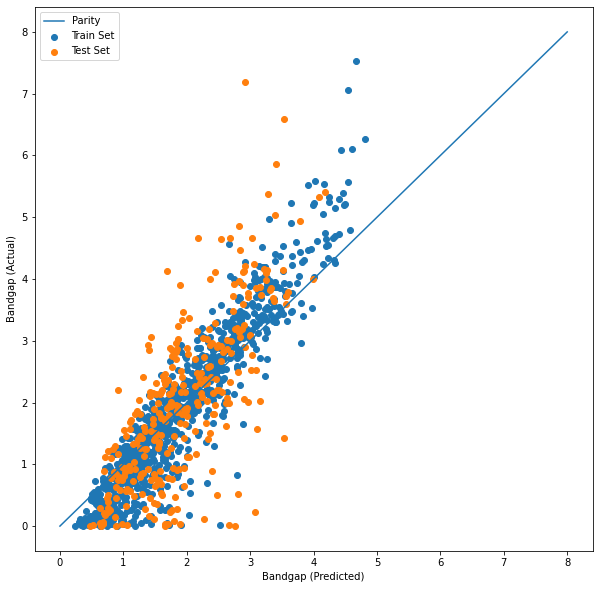

In [309]:
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)

plt.scatter(x=train_y_pred, y=train_y, label="Train Set")
plt.scatter(x=test_y_pred, y=test_y, label="Test Set")
plt.plot([0,8], [0,8], label="Parity")
plt.ylabel("Bandgap (Actual)")
plt.xlabel("Bandgap (Predicted)")
plt.legend()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


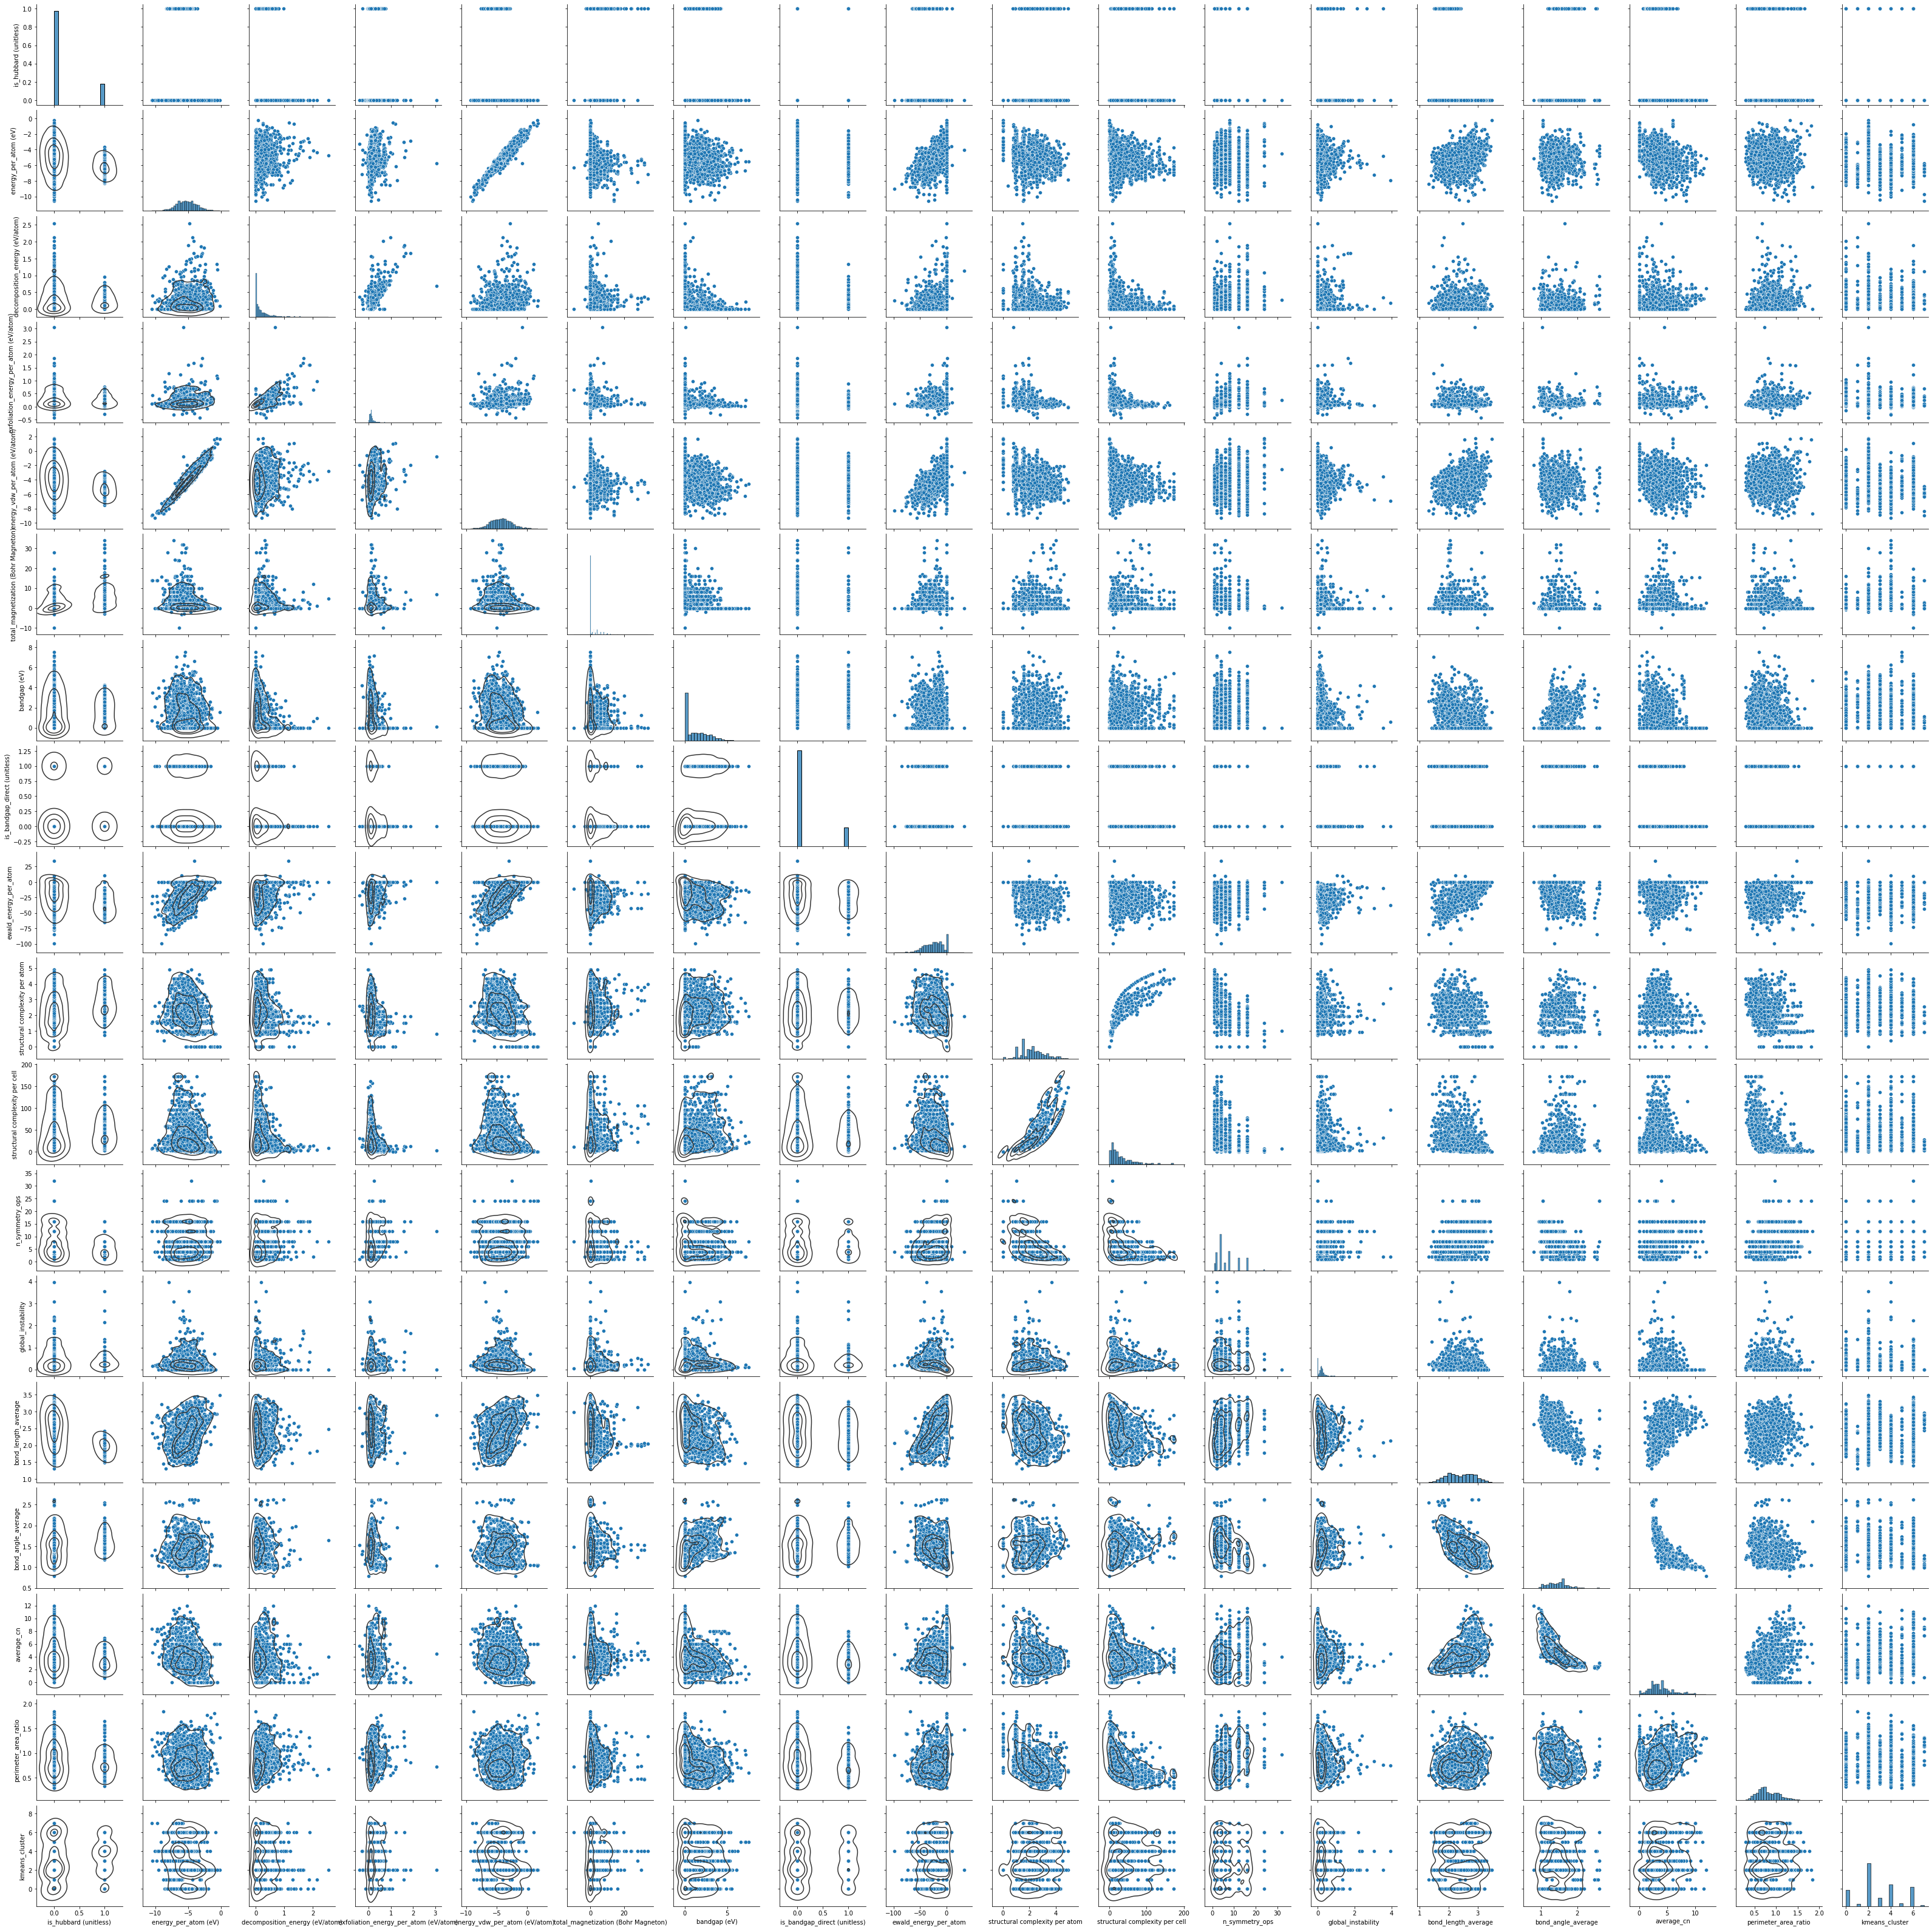

In [284]:
g = sns.pairplot(masked_df)
g.map_lower(sns.kdeplot, levels=4, color=".2")

Imputing missing values in feature set


In [462]:
temp = df[df["bandgap (eV)"]>0.1].copy()

x = temp.drop(columns=to_drop + [ "exfoliation_energy_per_atom (eV/atom)", "kmeans_cluster", "bandgap (eV)", "formula", "2dm_id (unitless)"])
y = temp["bandgap (eV)"]

y_pred = model.predict(x)

temp["pred"] = y_pred
temp["abs_err"] = abs(temp["pred"] - temp["bandgap (eV)"]) 
temp["tan_err"] = temp["pred"] / temp["bandgap (eV)"]
temp = temp[temp["decomposition_energy (eV/atom)"] == 0]

fblock_and_synth = ["La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu",
                    "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr",
                    "Rf", "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Tg", "Cn", "Nh", "Fl", "Mc", "Mc", "Lv", "Ts", "Og"]
temp = temp[temp["atoms_object (unitless)"].apply(lambda atoms: all(symbol not in fblock_and_synth for symbol in atoms.get_chemical_symbols()))].sort_values("tan_err")
temp[temp["is_hubbard (unitless)"]==True]

Imputing missing values in feature set


2dm_id (unitless)     formula discovery_process (unitless)  \
5001          2dm-5012     NiO8Re2                     top-down   
4782          2dm-4793         F4W                     top-down   
4580          2dm-4591    CdMoO6Te                     top-down   
4331          2dm-4342        CrF2                     top-down   
4280          2dm-4291     Cl2NiO8                     top-down   
5776          2dm-5787        F3OV                     top-down   
4248          2dm-4259  Br2CoO3Sb2                     top-down   
3468          2dm-3479       CdO4W                     top-down   
5118          2dm-5129        BrOV                     top-down   
3889          2dm-3900       ClFeO                     top-down   
4772          2dm-4783       O8P2W                     top-down   
3977          2dm-3988    F12MnSb2                     top-down   
5709          2dm-5720       F6LiW                     top-down   
3731          2dm-3742        ClOV                     top-down   
5146          2dm-5157     MnO8Re2                     top-down   
3606          2dm-3617       ClCrO                     top-down   
5462          2dm-5473     Cl2CoO8                     top-down   
5397          2dm-5408  Cl2Co2O3Te                     top-down   
5222          2dm-5233   BrFeO3Sr2                     top-down   
5383          2dm-5394     MoNb2O8                     top-down   
5278          2dm-5289   ClFeO3Sr2                     top-down   
5152          2dm-5163        CoF4                     top-down   
4357          2dm-4368     CoO8Re2                     top-down   
5252          2dm-5263       F2O2W                     top-down   

                                atoms_object (unitless)  \
5001  (Atom('Re', [-2.5286670901625286e-06, 3.312453...   
4782  (Atom('W', [3.4104760652784596, 2.255622693342...   
4580  (Atom('Cd', [0.0, 0.0, 13.85080587], index=0),...   
4331  (Atom('Cr', [1.780985825, 2.79194967, 10.76340...   
4280  (Atom('Ni', [0.0, 0.0, 13.1783695], index=0), ...   
5776  (Atom('V', [4.627308756089256, 1.0953532398443...   
4248  (Atom('Co', [4.36658798771821, 1.9298735635801...   
3468  (Atom('Cd', [2.5367015449999997, 1.17836882750...   
5118  (Atom('V', [1.728028725, 0.0, 11.8803000920122...   
3889  (Atom('Fe', [1.648572275, 0.0, 13.521820751160...   
4772  (Atom('P', [1.3043343675, 2.3992598300403354, ...   
3977  (Atom('Mn', [1.26891274, 2.446474105, 13.72611...   
5709  (Atom('Li', [0.668254423146266, 0.910179236897...   
3731  (Atom('V', [1.68203612, 0.0, 13.57008946060445...   
5146  (Atom('Mn', [0.0, 0.0, 13.559565], index=0), A...   
3606  (Atom('Cr', [0.0, 0.0, 13.43696024263994], ind...   
5462  (Atom('Co', [4.78643327988211, 2.7634481350567...   
5397  (Atom('Co', [3.3394432099159816, 1.62985553732...   
5222  (Atom('Sr', [1.98079031, 0.0, 21.3108264586346...   
5383  (Atom('Nb', [3.830719141058855, 4.872785276515...   
5278  (Atom('Sr', [1.96926641, 0.0, 11.1910057977042...   
5152  (Atom('Co', [2.758399422854857, 0.023447691947...   
4357  (Atom('Co', [0.0, 0.0, 13.500976], index=0), A...   
5252  (Atom('W', [1.7987240221432685, 7.528095085511...   

                                     potcars (unitless)  \
5001  [PAW_PBE Re_pv 06Sep2000, PAW_PBE Ni_pv 06Sep2...   
4782      [PAW_PBE W_pv 06Sep2000, PAW_PBE F 08Apr2002]   
4580  [PAW_PBE Cd 06Sep2000, PAW_PBE Te 08Apr2002, P...   
4331     [PAW_PBE Cr_pv 07Sep2000, PAW_PBE F 08Apr2002]   
4280  [PAW_PBE Ni_pv 06Sep2000, PAW_PBE Cl 17Jan2003...   
5776  [PAW_PBE V_pv 07Sep2000, PAW_PBE O 08Apr2002, ...   
4248  [PAW_PBE Co 06Sep2000, PAW_PBE Sb 06Sep2000, P...   
3468  [PAW_PBE Cd 06Sep2000, PAW_PBE W_pv 06Sep2000,...   
5118  [PAW_PBE V_pv 07Sep2000, PAW_PBE Br 06Sep2000,...   
3889  [PAW_PBE Fe_pv 06Sep2000, PAW_PBE Cl 17Jan2003...   
4772  [PAW_PBE P 17Jan2003, PAW_PBE W_pv 06Sep2000, ...   
3977  [PAW_PBE Mn_pv 07Sep2000, PAW_PBE Sb 06Sep2000...   
5709  [PAW_PBE Li_sv 23Jan2001, PAW_PBE W_pv 06Sep20...   
3731  [PAW_PBE V_pv 07Sep20

In [344]:
df["decomposition_energy (eV/atom)"].describe()

count    1863.000000
mean        0.179186
std         0.264176
min         0.000000
25%         0.000000
50%         0.084705
75%         0.250378
max         2.538792
Name: decomposition_energy (eV/atom), dtype: float64

In [375]:
import sklearn.model_selection
import tpot

temp = temp.drop(columns=["pred", "abs_err", "tan_err"])

In [434]:
data_train, data_test = sklearn.model_selection.train_test_split(temp, test_size=0.1, random_state=RANDOM_SEED)
train_x = data_train.drop(columns="bandgap (eV)").to_numpy()
train_y = data_train["bandgap (eV)"].to_numpy()

test_x = data_test.drop(columns="bandgap (eV)").to_numpy()
test_y = data_test["bandgap (eV)"].to_numpy()

model = tpot.TPOTRegressor(
    generations=None,
    population_size=120,
    max_eval_time_mins=5/60,
    max_time_mins=1,
    cv=4,
    verbosity=2,
    scoring="neg_root_mean_squared_error",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=6,
    random_state=RANDOM_SEED
)
model.fit(features=train_x, target=train_y)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


1.29 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.2, min_samples_leaf=2, min_samples_split=7, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

Imputing missing values in feature set
Imputing missing values in feature set


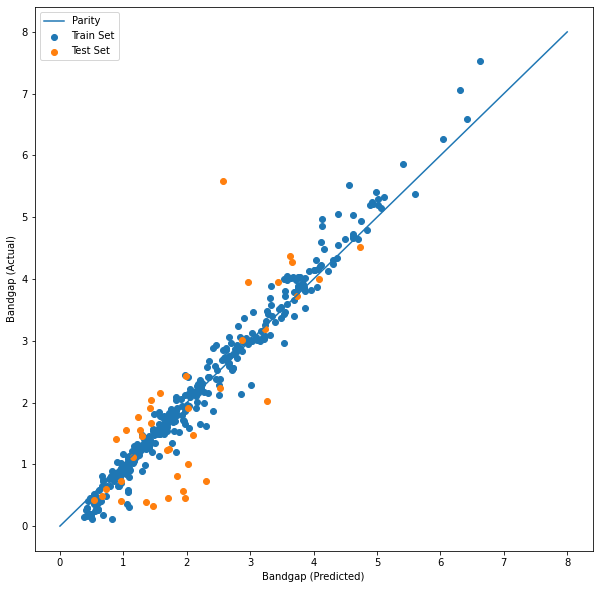

In [435]:
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)

plt.scatter(x=train_y_pred, y=train_y, label="Train Set")
plt.scatter(x=test_y_pred, y=test_y, label="Test Set")
plt.plot([0,8], [0,8], label="Parity")
plt.ylabel("Bandgap (Actual)")
plt.xlabel("Bandgap (Predicted)")
plt.legend()

In [436]:
sklearn.metrics.mean_absolute_error(test_y, test_y_pred)

0.6271031970833333

In [437]:
foo = sklearn.model_selection.cross_validate(model.fitted_pipeline_, temp.drop(columns="bandgap (eV)").fillna(temp.drop(columns="bandgap (eV)").mean()).to_numpy(),
                                             temp["bandgap (eV)"],
                                             scoring="neg_mean_absolute_error")

In [438]:
abs(sum(foo["test_score"]) / len(foo["test_score"]))

0.611542178811533